<a href="https://colab.research.google.com/github/srishtispatil/ML-in-python-projects/blob/main/crop_recommendation(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

upload=files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [4]:
import numpy as np # linear algebra
import pandas as pd

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy

In [6]:
crop_df = pd.read_csv('Crop_recommendation.csv')
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,82.002744,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

In [9]:
num_feat = crop_df.select_dtypes(exclude = 'object')

<ipython-input-8-8acbc6b57e2d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


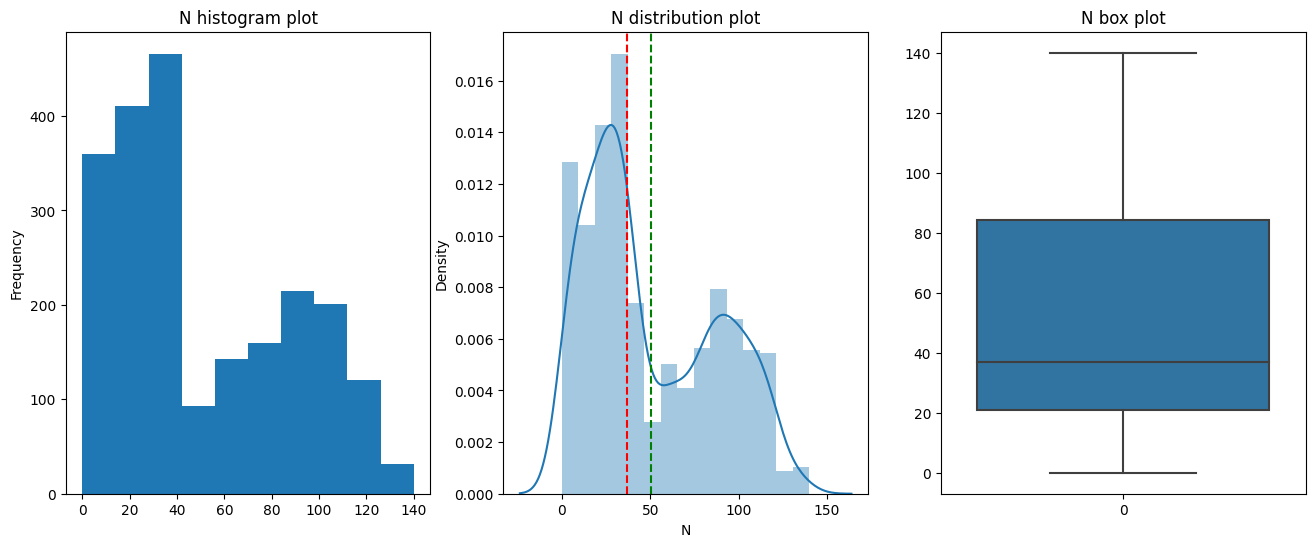

<ipython-input-8-8acbc6b57e2d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


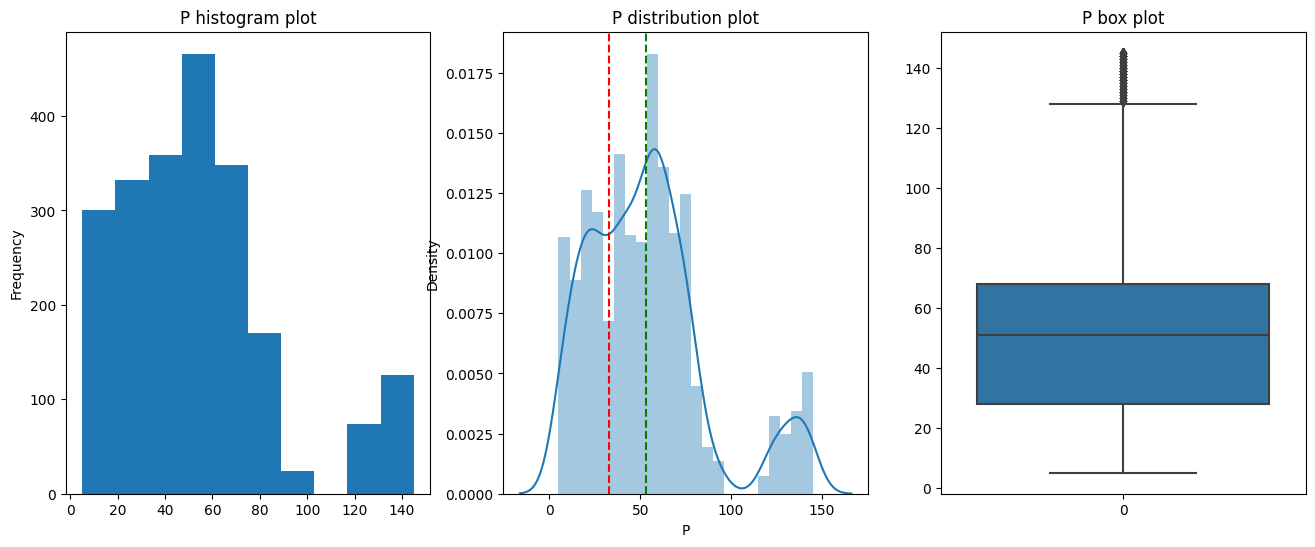

<ipython-input-8-8acbc6b57e2d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


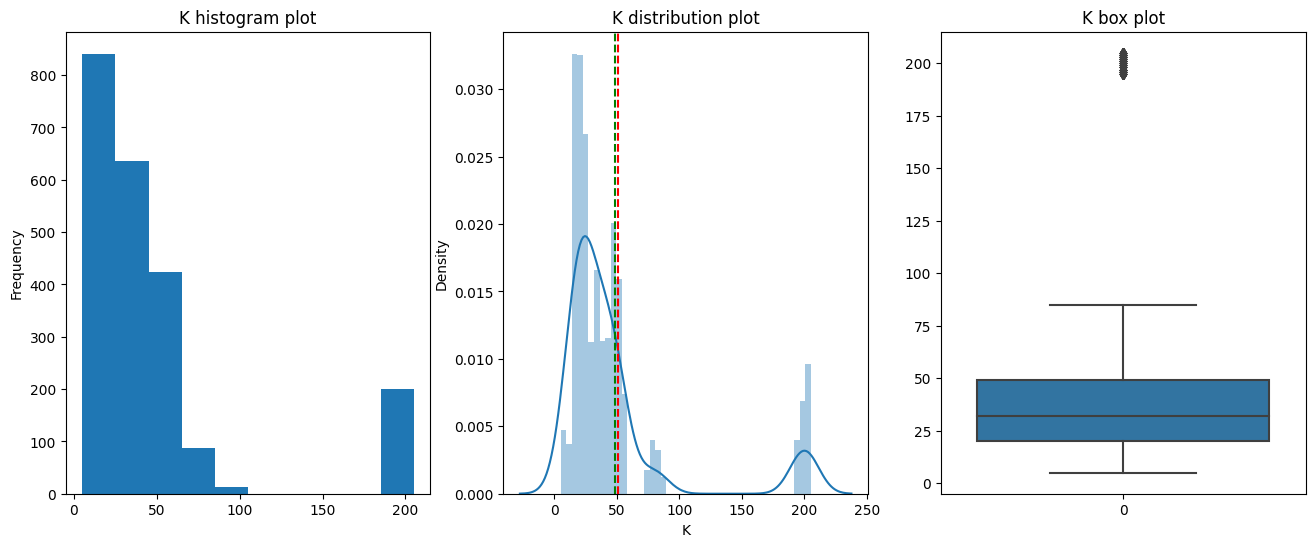

<ipython-input-8-8acbc6b57e2d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


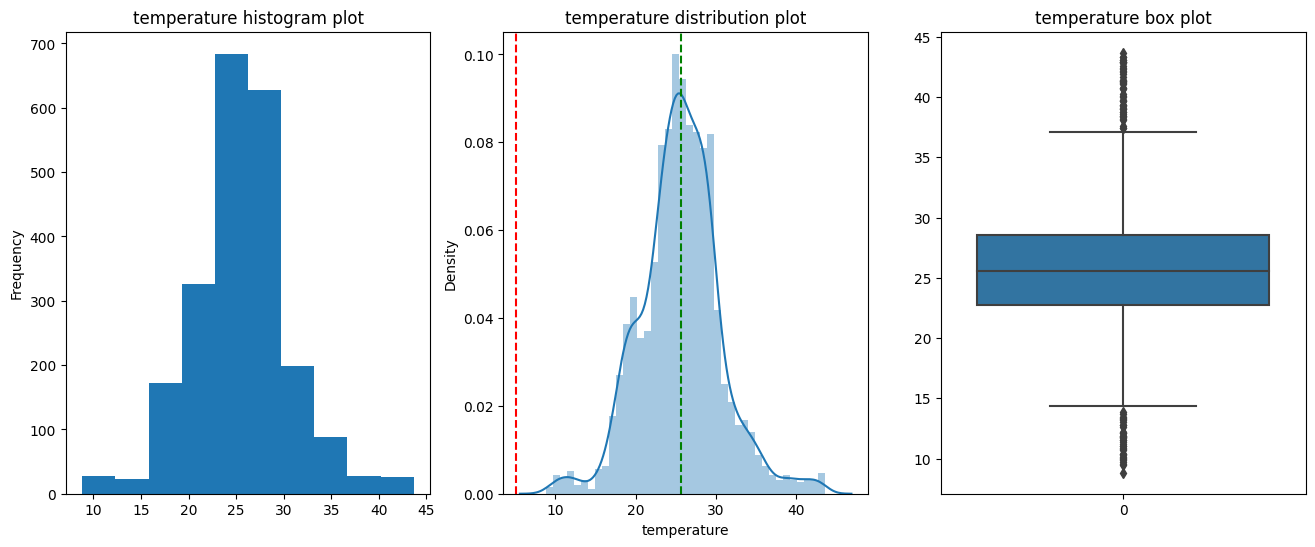

<ipython-input-8-8acbc6b57e2d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


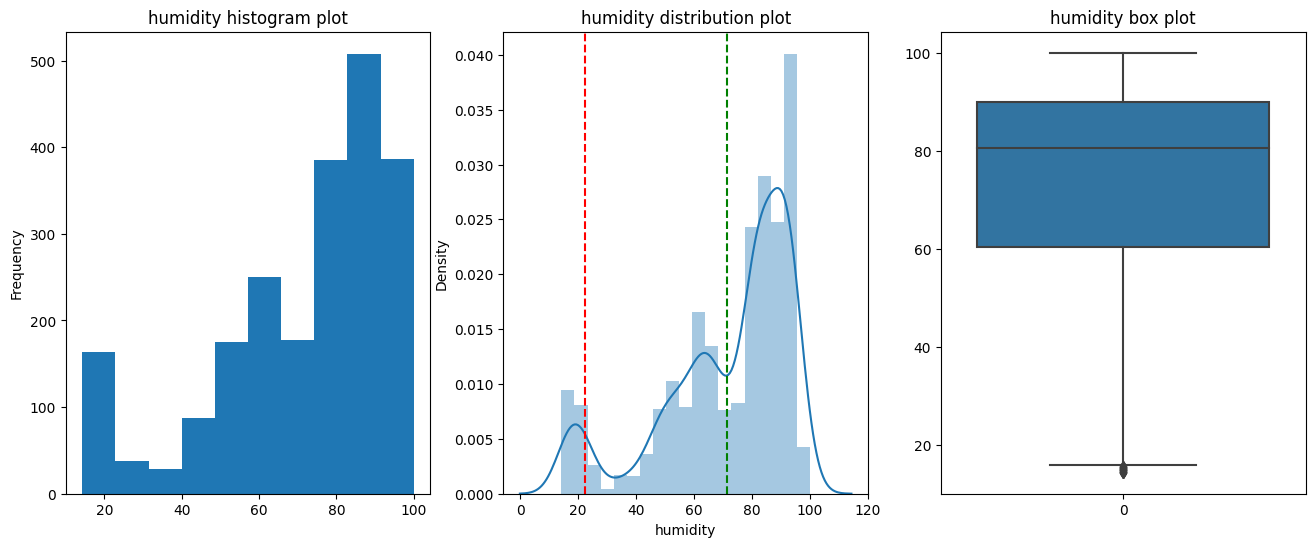

<ipython-input-8-8acbc6b57e2d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


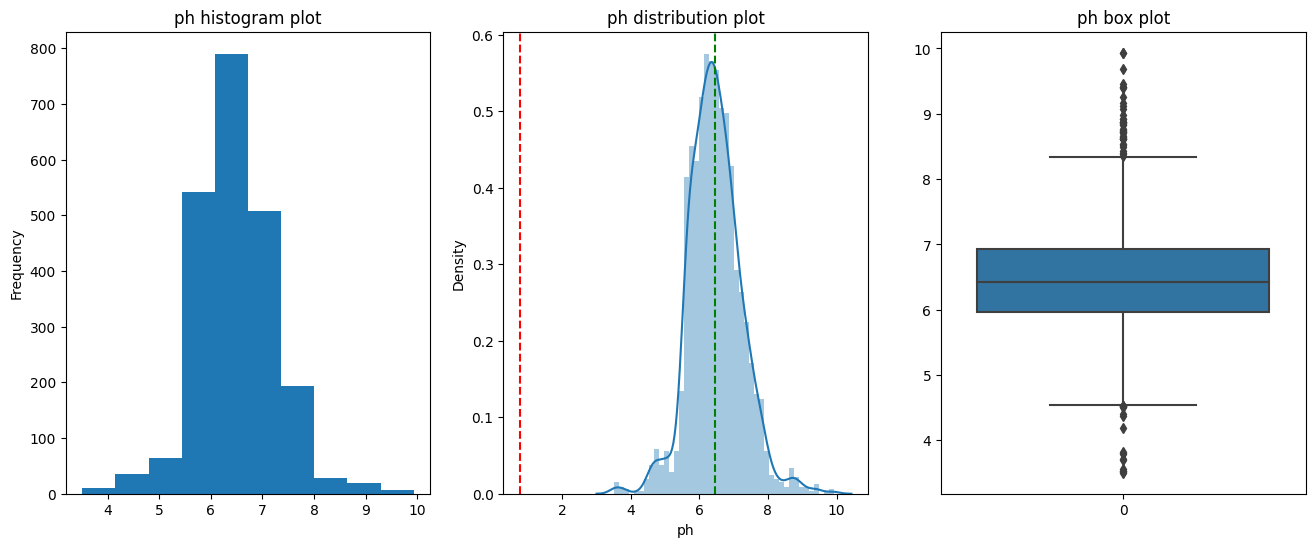

<ipython-input-8-8acbc6b57e2d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


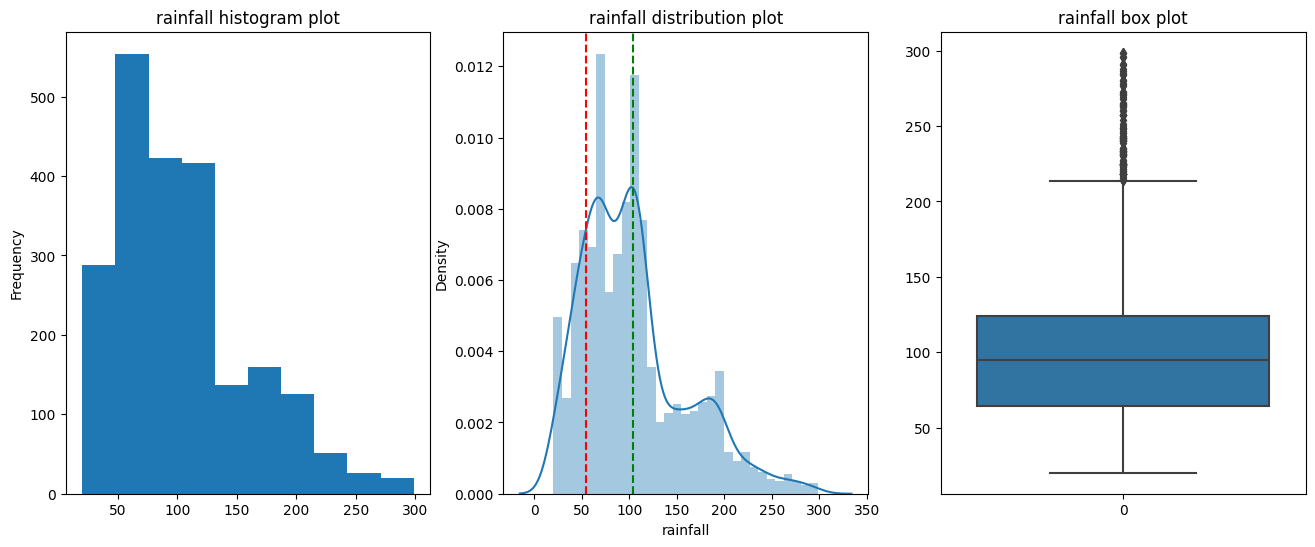

In [10]:
for i in num_feat.columns:
    feat_plot(num_feat[i])

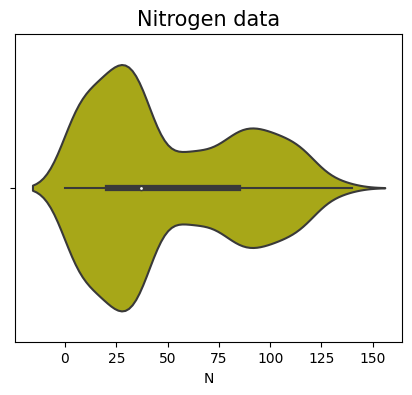

In [11]:
plt.figure(figsize=(5,4))
sns.violinplot(x='N',data=crop_df,color='y');
plt.title("Nitrogen data",{'fontsize':15});

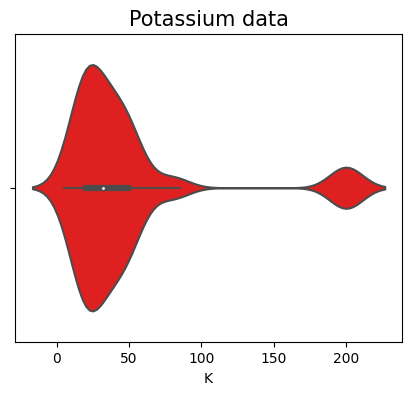

In [12]:
plt.figure(figsize=(5,4))
sns.violinplot(x='K',data=crop_df,color='r');
plt.title("Potassium data",{'fontsize':15});

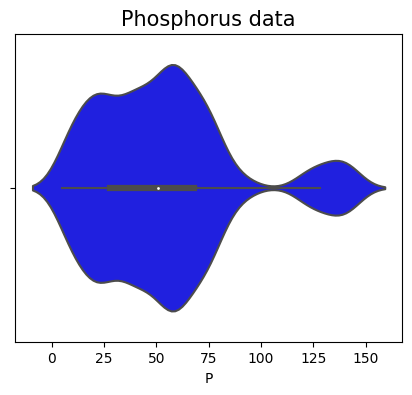

In [13]:
plt.figure(figsize=(5,4))
sns.violinplot(x='P',data=crop_df,color='b');
plt.title("Phosphorus data",{'fontsize':15});

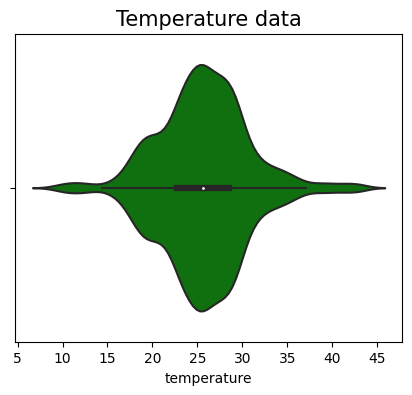

In [14]:
plt.figure(figsize=(5,4))
sns.violinplot(x='temperature',data=crop_df,color='g');
plt.title("Temperature data",{'fontsize':15});

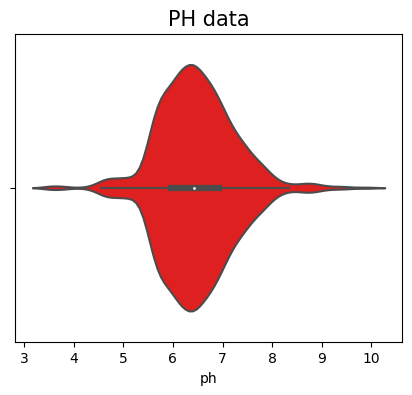

In [15]:
plt.figure(figsize=(5,4))
sns.violinplot(x='ph',data=crop_df,color='r');
plt.title("PH data",{'fontsize':15});

In [16]:
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [17]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,82.002744,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [18]:
crop_df['no_label'] = pd.Categorical(crop_df.label).codes

In [19]:
X = crop_df.drop(['label','no_label'],axis=1)
y = crop_df.no_label

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [21]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [22]:
models = {
    LogisticRegression(max_iter=500):'Logistic',
    RandomForestClassifier():'Forest',
    SVC():'Support Vector Machine'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print("Accuracy for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy for {name} is :  98.4090909090909 %
Accuracy for {name} is :  100.0 %
Accuracy for {name} is :  98.86363636363636 %


In [23]:
rf = LogisticRegression(max_iter=500)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        16
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        24
           6       1.00      0.95      0.98        21
           7       1.00      1.00      1.00        25
           8       0.90      0.95      0.93        20
           9       0.93      1.00      0.96        26
          10       0.94      0.94      0.94        16
          11       0.90      1.00      0.95        18
          12       1.00      1.00      1.00        24
          13       0.94      0.94      0.94        17
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        23
          17       1.00    

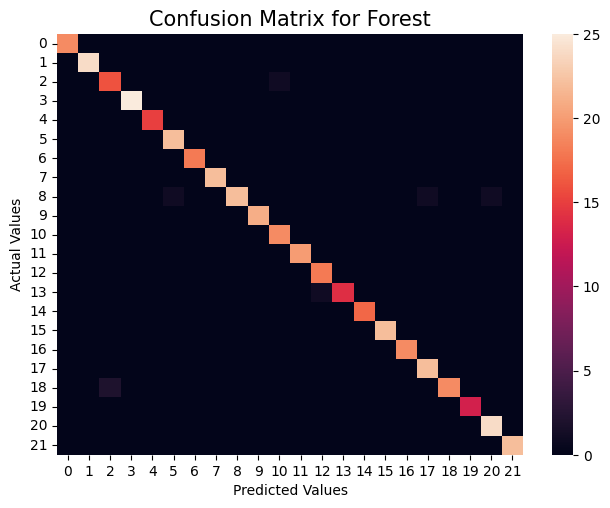

In [24]:
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = False,fmt = 'd')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion Matrix for Forest', {'fontsize':15})
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()